# Diffusion Magnétique: Travail Personnel 2, MATH-F314
Auteur: Dechamps Sébastien, Maxime Rousseau

In [1]:
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
from matplotlib import rcParams, cm
from matplotlib import animation
from IPython.display import HTML
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## Question1:
Pour obtenir l'équation de diffusion, il nous suffit de combiner les 4 équations:
$$   \left \{
   \begin{array}{r c l}
      \vec{\nabla} . \vec{B}  & = & \vec{0}  \quad(1)\\
      \vec{\nabla} x \vec{E}  & = & -\partial_{t}\vec{B}   \quad(2) \\
      \vec{\nabla} x \vec{B} & = & \mu\vec{J}  \quad(3)\\
      \vec{E}    & = &  \sigma\vec{J}   (4)
   \end{array}
   \right .$$
   
   
   on obtient alors :
   $$   \left \{
   \begin{array}{r c l}
      \vec{\nabla} . \vec{B}  & = & \vec{0} \\
      \vec{\nabla} x \frac{\vec{\nabla} x \vec{B}}{\mu\sigma}  & = & -\partial_{t}\vec{B} \\
      \frac{\vec{\nabla} x \vec{B}}{\mu\sigma} & = & \vec{E} \\
      \frac{\vec{E}}{\sigma}    & = &  \vec{J}
   \end{array}
   \right .$$
   
   comme :
   $$\vec{\nabla}x(\vec{\nabla}x\vec{B})= \vec{\nabla}.( \vec{\nabla}.\vec{B})-\triangle\vec{B}$$
   
   
  
   $$\rightarrow\triangle\frac{\vec{B}}{\mu\sigma}   =  \partial_{t}\vec{B}$$
   
   qui est bel et bien l'équation de diffusion.
   
   




## Question 2:

Dans la question 2 nous étudions les conditions de bord du champs magnétique.
Nous supposons que l'extérieur de la puce est le milieu 1, la partie conductrice à conductivité finie est le milieu 2 et le centre de la puce supraconductrice est le milieu 3.
### Condition de bord Dirichlet:
Nous savons que l'équation (3) nous donne comme condition que au bord nous avons :
$$\vec{n_{2-1}}x(\vec{B_{2}}-\vec{B_{1}})= \mu\vec{J}\\
=> -\vec{u_{x}}x(\vec{B_{2}}-\vec{0})=\mu J\vec{u_{y}} $$
Nous considérons ici le cas particulier du côté externe gauche de la puce. De plus, nous remarquons que le courant électrique est toujours perpendiculaire à la normale du bord dans le plan xy.

Etant donné le sens du courant électrique en utilisant la règle de la main droite, il vient que le champ magnétique est:
$$ \vec{B}=-B \vec{u_{z}}$$
Et donc:

$$B_{2}\vec{u_{y}}=\mu\vec{J}$$

En procédant de la même manière on obtient pour le côté haut,droite,bas:

$$  \left \{
   \begin{array}{r c l}
      B_{2}\vec{u_{x}}  & = & \mu J\vec{u_{x}}  \quad\text{(haut)}\\
      -B_{2}\vec{u_{y}}  & = & -\mu J\vec{u_{y}}  \quad\text{(droite)} \\
      -B_{2}\vec{u_{x}} & = & -\mu J\vec{u_{x}}  \quad\text{(bas)}\\   
   \end{array}
   \right .$$







Nous avons donc pour tout les cotés: $$B_{2}=\mu J$$ 


les condition au bord sont donc 
$$ \vec{B}=-\mu J \vec{u_{z}}$$

### Condition de bord Von Neuman:
 Pour le bord du supraconducteur nous allons utiliser la continuité du vecteur tangentielle du champ électrique,
 c'est à dire :
 

$$ \vec{n_{3-2}}x(\vec{E_{3}}-\vec{E_{2}})=\vec{0}\\
<=> -\vec{u_{x}}x(E_{3}-\frac{J_{2}}{\sigma_{2}}\vec{u_{y}})=\vec{0} \qquad\text{il s'agit ici du cas particulier du côté gauche du bord du supraconducteur}\\
=> \vec{E_{3}}=\frac{J_{2}}{\sigma_{2}}\vec{u_{y}} \qquad\text{nous obtenons ainsi la condition sur le champ électrique au bord,}$$
$$\text{ i.e:} \vec{E_{3}}=\frac{\vec{J_{2}}}{\sigma_{2}}$$


$\text{Nous utilisons donc cette condition dans l'équation (3): }\vec{\nabla}x\vec{B_{3}}=\mu\vec{J_{2}}\\
\text{dans le cas particulier du bord gauche du supraconducteur nous obtenons: } \partial_{x}B=\mu J_{2}\\$$
$$\text{(remarque:ils'agit ici de la densité de courant électrique au bord du supraconducteur, et donc }\\
\text{comme la puce est conductrice, et que le côté extérieure est 3x fois plus long que le côté interne, }\\
\text{la densité de courant électrique sera opposé et 3 fois plus grande sur le côté interne par rapport à la densité}\\
\text{de courant électrique sur le côté externe), i.e:  }$$
$$ \vec{J_{ext}} =- \frac{l_{ext}}{l_{int}}\vec{J_{int}} = -3\vec{J_{int}}\\$$
$$\text{en utilisant le même raisonnement nous arrivons à:}$$

$$\left \{
   \begin{array}{r c l}
     \partial_{y}B_{3}  & = & -3\mu J_{2}  \quad\text{haut}\\
      \partial_{x}B_{3}  & = & -3\mu J_{2}   \quad\text{droite} \\
      \partial_{y}B_{3} & = & 3\mu J_{2}  \quad\text{bas}\\
   \end{array}
   \right . $$

## Question3:

Pour calculer l'évolution au cours du temps du champ magnétique par la méthode d'Euler (forward) dans le temps, et avec une discrétisation centrée d'ordre 2 pour le laplacien nous implémentons la fonction ftcs qui corespond notre problème


Nous avons 
$$B^{n+1}_{i,j} = B^{n}_{i,j} + \alpha[\frac{\Delta t}{\Delta x^2}(B^{n}_{i+1,j} - 2B^{n}_{i,j} + B^{n}_{i-1,j}) + \frac{\Delta t}{\Delta y^2}(B^{n}_{i,j+1} - 2B^{n}_{i,j} + B^{n}_{i,j-1})]$$



Cependant nous avons que dans le supraconduteur le champ B = 0 à tout instant. Ce phénomène est du à l'effet Meissner.

In [24]:
def ftcs(B, nt, alpha, dt, dx, dy):

    for n in range(nt):
        Bn = B.copy()
        
        #Nous implémentons l'équation ci dessus en faisant attention que dans la partie supra conductrice, le champ B=0 
        B[1:40,1:-1] = Bn[1:40,1:-1] + alpha *\
            (dt/dy**2 * (Bn[2:41,1:-1] - 2*Bn[1:40,1:-1] + Bn[:39,1:-1]) +\
             dt/dx**2 * (Bn[1:40,2:] - 2*Bn[1:40,1:-1] + Bn[1:40,:-2]))
            
  
            
        B[40:80,1:40] = Bn[40:80,1:40] + alpha *\
            (dt/dy**2 * (Bn[41:81,1:40] - 2*Bn[40:80,1:40] + Bn[39:79,1:40]) +\
             dt/dx**2 * (Bn[40:80,2:41] - 2*Bn[40:80,1:40] + Bn[40:80,:39]))   
            
        
        B[40:80,80:-1] = Bn[40:80,80:-1] + alpha *\
            (dt/dy**2 * (Bn[41:81,80:-1] - 2*Bn[40:80,80:-1] + Bn[39:79,80:-1]) +\
             dt/dx**2 * (Bn[40:80,81:] - 2*Bn[40:80,80:-1] + Bn[40:80,79:-2]))   
            

            
        B[80:-1,1:-1] = Bn[80:-1,1:-1] + alpha *\
            (dt/dy**2 * (Bn[81:,1:-1] - 2*Bn[80:-1,1:-1] + Bn[79:-2,1:-1]) +\
             dt/dx**2 * (Bn[80:-1,2:] - 2*Bn[80:-1,1:-1] + Bn[80:-1,:-2]))
            
            
        #Condition de bord Neumann 
        B[40:81,40] = 3*µ*J*dx + B[40:81,39]  #Gauche
        B[40:81,80] = -3*µ*J*dx + B[40:81,81]   #Droite
        B[40,40:81] = 3*µ*J*dx + B[39,40:81]  #Bas  
        B[80,40:81] = -3*µ*J*dx + B[81,40:81]  #Haut
        
    
            
        
    return B

Nous définissons nos conditions initiales en fonction du problème posé, et choisissons les paramètres de discrétisation

In [25]:
L = 1.5e-2                   #Longueur 
H = 1.5e-2                   #Hauteur

n = 121                      #Nombre de points dans x
n = 121                      #Nombre de points dans y

dx = L/120                   #Distance entre 2 points en x  
dy = H/120                   #Distance entre 2 points en y

dtt = 2.5e-7                 #Pas de temps
nt = int(1.25e-3/2.5e-7)     #Nombre d'itération pour pour arriver à 1.25e-3 s
ntt = int(1.25e-2/2.5e-7)    #Nombre d'itération pour pour arriver à 1.25e-2 s

#Implémentation des paramètres et conditions initial
µ = 1.26e-6     
J = 1    
sigma = 5.96e7       
alpha = 1/(µ*sigma)        
Bi = numpy.zeros((n,n))

#Condition de bord Dirichlet 
Bi[0,:] = -µ*J    #Bas
Bi[:,0] = -µ*J    #Gauche
Bi[-1,:] = -µ*J   #Haut
Bi[:,-1] = -µ*J   #Droite

x = numpy.linspace(0, L, n)   #Découpage de L en 121
y = numpy.linspace(0, H, n)   #Découpage de H en 121

###  Condition de Stabilité de la méthode numérique:

Si nous définissons la stabilité comme :
$$\exists c>0 \quad | \forall\Delta t, \Delta x,\Delta y \qquad \text{où } \forall n\in\mathbb{N} \quad 0<n\Delta t< T\\
\text{et} \Delta x= \Delta y\quad \text{dans le cas particulier de ce travail}\\
\text{Alors: } \Vert B^{n+1}\Vert_{\infty}\le c*\Vert B^0 \Vert_{\infty} $$
Notre méthode numérique s'écrit alors sous forme matricielle comme : 

$$B^{n+1}=M(\alpha)B^{n}\qquad \text{où }M(\alpha)=(I-\alpha * (A+A^{t})\\
\text{et} \alpha=\frac{1}{\mu\sigma}\frac{\Delta t}{\Delta x^{2}}$$
$$\begin{pmatrix}
2 & -1 & 0 & \ldots & \ldots & 0 \\
-1 & 2& -1& 0 & \ldots & 0\\
0 & -1 & 2 & -1 & \ldots & 0\\
\vdots & 0 & \ddots & \ddots & \ddots & 0\\
0 & \ldots & \ldots & \ldots & -1 & 2
\end{pmatrix}$$
Nous avons donc par réccurence : 
$$B^{n+1}=M^{n}(\alpha)B^{0}\\
\text{or si } \alpha\le \frac{1}{2}\text{, on a:}\\
\Vert M(\alpha)\Vert_{\infty}=\underset{i}{Max}(\underset{j}{\sum}m_{ij})=1\\
\rightarrow \Vert B^{n+1}\Vert_{\infty}\le\Vert B^{0}\Vert$$



La dondition de stabilite est
$$\alpha (\frac{\Delta t}{(\Delta x)^2} + \frac{\Delta t}{(\Delta y)^2}) < \frac{1}{2}$$
Comme $\Delta x$ et $\Delta y$ sont égaux nous avons $\Delta x$ =$\Delta y$ = $\delta$ et donc
$$\alpha \frac{\Delta t}{(\delta)^2} < \frac{1}{4}$$

Pour notre problème nous avons donc la condition de stabilite suivante dt < A


In [4]:
A = (0.25*dx*dx)/alpha
print("dt <", A, "s")

dt < 2.9334375e-07 s


Nous pouvons donc prendre un pas de temps de  2.5e-7

Cette fonction calcule le champ B pour nt iteration
Nous pouvons donc calculer le champs B pour $t = 1,25\cdot10^{-3}$ s et $t = 1,25\cdot10^{-2}$ s

In [26]:
B = ftcs(Bi.copy(), nt, alpha, dtt, dx, dy)      #B pour t = 1.25e-3
B0 = ftcs(Bi.copy(), ntt, alpha, dtt, dx, dy)    #B pour t = 1.23e-2

Nous envoyons une copie de Bi à la fonction ftcs. L'envoi d'une copie assure que la valeur de Bi reste inchangée pour pouvoir la réutiliser 

Nous voulons maintenant visualiser nos résultats 

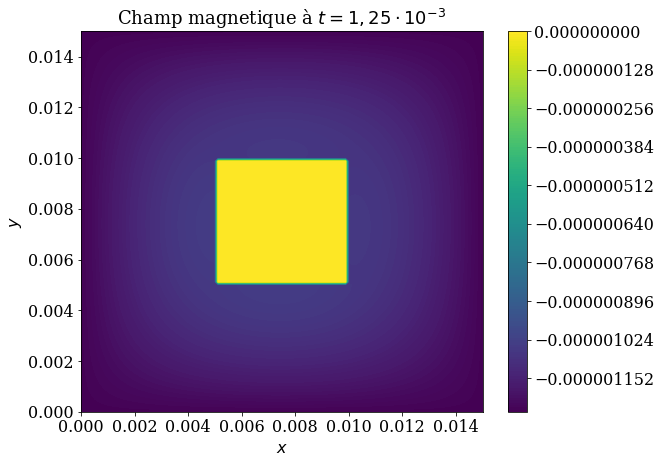

In [6]:
pyplot.figure(figsize=(9,7))
pyplot.contourf(x,y,B,200,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Champ magnetique à $t = 1,25\cdot10^{-3}$', fontsize=18)
pyplot.colorbar();

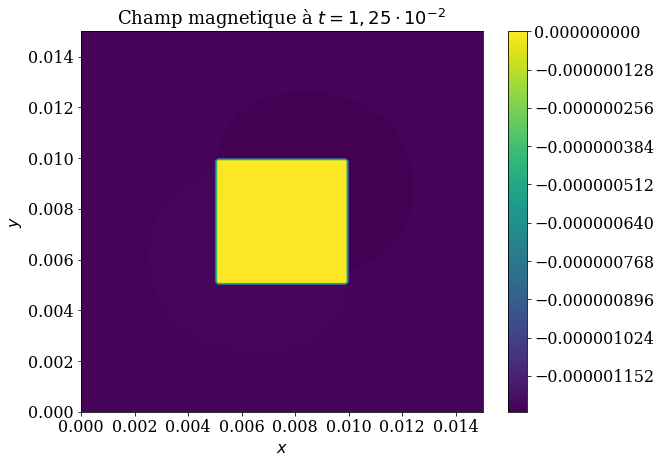

In [7]:
pyplot.figure(figsize=(9,7))
pyplot.contourf(x,y,B0,200,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Champ magnetique à $t = 1,25\cdot10^{-2}$', fontsize=18)
pyplot.colorbar();

## Question4:

Nous allons maintenant réaliser l'animation pour mieux nous rendre compte de ce qu'il ce passe 

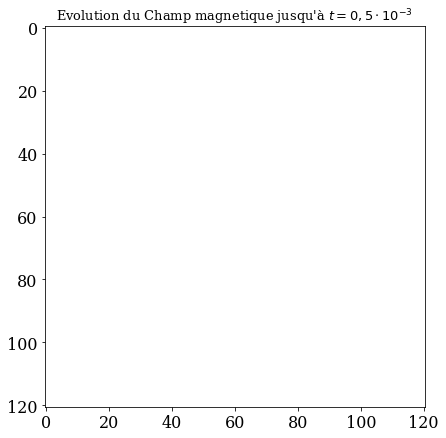

In [8]:
fig = plt.figure(figsize=(9,7))
pyplot.title("Evolution du Champ magnetique jusqu'à $t = 0,5\cdot10^{-3}$", fontsize=13)

liste = []                 #On crée une liste qu'on va renplir d'image du champ B à plusieur instant 
temps=0                        
for i in range(100):     #On va itérer 100 fois 
    Bi = numpy.zeros((n,n))     #On crée la matrice initiale de B
    #Implémentation des condition de Dirichlet 
    Bi[0,:] = -µ
    Bi[:,0] = -µ
    Bi[-1,:] = -µ
    Bi[:,-1] = -µ
    #On crée le graph de B apres "temps" itération
    graph = plt.imshow(ftcs(Bi, temps, alpha, dtt, dx, dy), animated=True)
    #On met les graph obtenu dans une liste qu'on utilisera pour l'animation 
    liste.append([graph])
    #On ne prend pas tout les pas de temps mais seulement tout les 20 pas de temps 
    temps+=20
    
    

ani = animation.ArtistAnimation(fig, liste, interval=100, blit=True,
                                repeat_delay=1000)


plt.show()

In [9]:
HTML(ani.to_html5_video())

## Question5:

Nous voulons connaitre la valeur du champ B en $(x,y,z)=(2.5\cdot 10^{-3}{\rm m},2.5\cdot 10^{-3}{\rm m},0{\rm m})$

In [14]:
QQ = numpy.where(x == 2.5e-3)
DD = numpy.where(y == 2.5e-3)

In [15]:
print( B[QQ,DD])

[[ -1.22487972e-06]]


La valeur de B en ce point est $-1.17656774\cdot 10^{-6} kg⋅s^{−2}⋅A^{−1}$

In [16]:
print(B[20,21])
print(B0[20,21])

-1.22339269959e-06
-1.25932478329e-06


## Question 6 :
Nous savons que le champ magnétique B=(0,0,-B), donc en utilisant l'équation (3) nous pouvons, en utilisant la méthode d'euler, calculer numériquement la densité du courant électrique J au point demandé dans l'espace de phase (position,temps).
$$ \text{c'est à dire :} \quad \vec{\nabla}x\vec{B}=\partial_{x}B\vec{u_{y}} -\partial_{y}B\vec{u_{x}}=\mu\vec{J}\\
\Vert\vec{J}\Vert=\sqrt{\frac{1}{\mu^{2}}[(\frac{B(x+dx,y)-B(x-dx,y)}{2dx})^{2}+(\frac{B(x,y+dy)-B(x,y-dy)}{2dy})^{2}]} $$
Nous avons utilisé la méthode numérique qui permet de calculer la dérivée avec une différence centrale parce que l'erreur de troncature est moins grande que pour une différence forward ou backward:
$$\left\{\begin{array}{r c l}
f(x+h) & = & f(x) +\frac{hf'(x)}{1!}+\frac{h^{2}f''(x)}{2!}+\frac{h ^{3}f'''(x)}{3!}+...\\
f(x-h) & = & f(x) -\frac{hf'(x)}{1!}+\frac{h^{2}f''(x)}{2!}-\frac{h ^{3}f'''(x)}{3!}+...\\
\end{array}\right .
=> f(x+h)-f(x-h)=2\frac{hf'(x)}{2}+2\frac{h^{3}f'''(x)}{3!}+...\\
=> E_{T}=\frac{h^{2}f'''(x)}{3!}+...=\overset{\infty} {\underset{i=1}{\sum}}O(\Delta^{2i+1})
$$

In [27]:
Jxx = (1/µ)*(B[20,21]-B[20,19])/(2*dx)
Jyy = (1/µ)*(B[21,20]-B[19,20])/(2*dy)

JJJ = (Jxx*Jxx + Jyy*Jyy)**(1/2)

print(JJJ)

32.1158319558


A l'instant $t=1.25\cdot 10^{-3}s$ la valeur de la densité de courant éléctrique ${\bf J}$ en $(x,y,z)=(2.5\cdot 10^{-3}{\rm m},2.5\cdot 10^{-3}{\rm m},0 {\rm m})$  est 32.1158319558 $A\cdot m^{-2}$  

## Question 7:
Pour calculer le flux magnétique, il nous suffit d'utiliser sa définition :
$$ \phi = \int\int\vec{B}d\vec{S}$$
On peut donc calculer numériquement sa valeur pour toute la puce avec la formule : 
$$\phi= -\overset{i-1}{\underset{i=0}{\sum}}B_{i}dxdy\qquad\text{car }d\vec{S}=dS\vec{u_{z}}\text{ et }\vec{B}=-B\vec{u_{z}}$$ 

Nous avonc donc

In [17]:
AA = numpy.sum(B0)*(1.5e-2*1.5e-2)
print(AA)

-3.71951999964e-06


La valeur du flux du champ magnétique à $t = 1,25.10^{-2}$ s est $-3.71951999914 \cdot 10^{-6} T.m^{2}$

Pour pouvoir discuter cette valeur nous regardons la valeur du champ magnétique à $t = 1,25.10^{-2}$ s à un endroit dans le conducteur 

In [18]:
print(B0[20,33])


-1.25893392089e-06


Après $1,25.10^{-2}$ s on a pu voir que le champ B c'était quasi uniformiser dans le conducteur. L'ordre de grandeur du flux du champ B est coérent avec la valeur du champ B 

# Référence :


NumericalMooc: 

Module1: Phugoid Model

Module2: Space and Time

Module3: Riding the wave

Module4: Spreading out

https://fr.wikipedia.org/wiki/Supraconductivit%C3%A9

https://fr.wikipedia.org/wiki/Effet_Meissner